
Recognizing Handwritten Digits with Python throgh ML algorightm know as LogisticRegression.In which we are going to analysis over 7000 different handwritten digits in which all comprise of 784 pixels(28*28).In this project our goal is to take all the data in visiualize it and understand each label correspond to 784 pixels and create our LogisticRegression model double accurataly predict each input array as value 0-9.


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
mnist.data.shape
print(mnist.target[0])

5


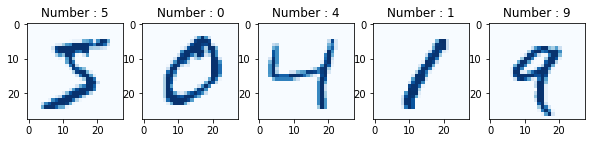

In [4]:
plt.figure(figsize=(10,4))
for index, (image,label) in enumerate (zip(mnist.data[:5],mnist.target[:5])):
    plt.subplot(1,5,index +1)
    plt.imshow(np.reshape(image,(28,28)),cmap="Blues")
    plt.title("Number : %s" %label)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(mnist.data,mnist.target,test_size=0.2)

In [6]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(x_train,y_train)
prediction = mdl.predict(x_test)
score = mdl.score(x_test,y_test)
print(score)

0.9204285714285714


c:\users\shrill\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


prediction : 5


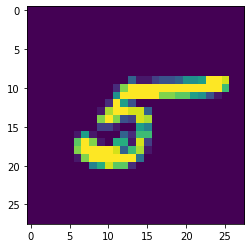

In [7]:
index = 0
plt.imshow(np.reshape(x_test[index],(28,28)))
print("prediction : " + mdl.predict([x_test[index]])[0])

In [8]:
cm = metrics.confusion_matrix(y_test,prediction)
cm

array([[1328,    1,    3,    2,    3,   12,    9,    2,   10,    3],
       [   0, 1462,    9,    4,    1,    4,    0,    2,   14,    5],
       [   5,   13, 1287,   28,   13,   11,   19,   19,   24,    7],
       [   2,    4,   27, 1296,    3,   34,    5,    5,   24,   17],
       [   4,    3,   10,    2, 1300,    2,   10,    5,   12,   55],
       [  16,    4,   11,   55,   10, 1144,   26,    4,   56,   14],
       [  15,    2,   11,    3,   19,   19, 1289,    2,   10,    1],
       [   6,    3,   22,    7,   12,    2,    1, 1316,    4,   56],
       [   8,   23,   24,   37,    3,   36,    8,    5, 1249,   15],
       [   5,    5,    2,   17,   30,    5,    0,   36,   17, 1215]],
      dtype=int64)

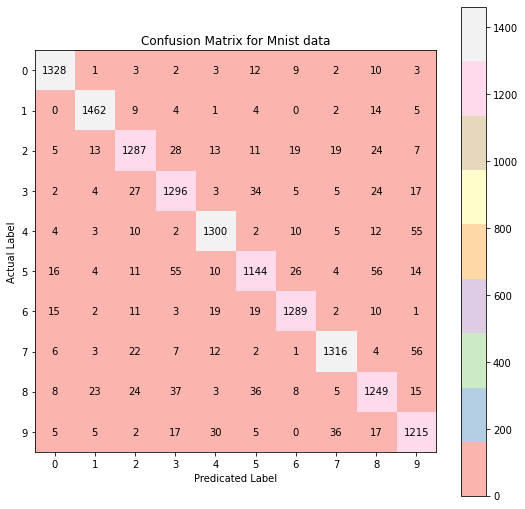

In [9]:
plt.figure(figsize=(9,9))
plt.imshow(cm , cmap = 'Pastel1')
plt.title("Confusion Matrix for Mnist data")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicated Label')

plt.colorbar()

width,height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str (cm[x][y]),xy=(y,x),horizontalalignment = 'center',verticalalignment='center')